In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv('/Users/quyngodseb63/Downloads/traffic_by_month.csv')

In [3]:
df

,month,traffic_volume
0,1,4495.613727
1,2,4711.198394
2,3,4889.409560
3,4,4906.894305
4,5,4911.121609
5,6,4898.019566
6,7,4595.035744
7,8,4928.302035
8,9,4870.783145
9,10,4921.234922


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   month           12 non-null     int64  
 1   traffic_volume  12 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 320.0 bytes


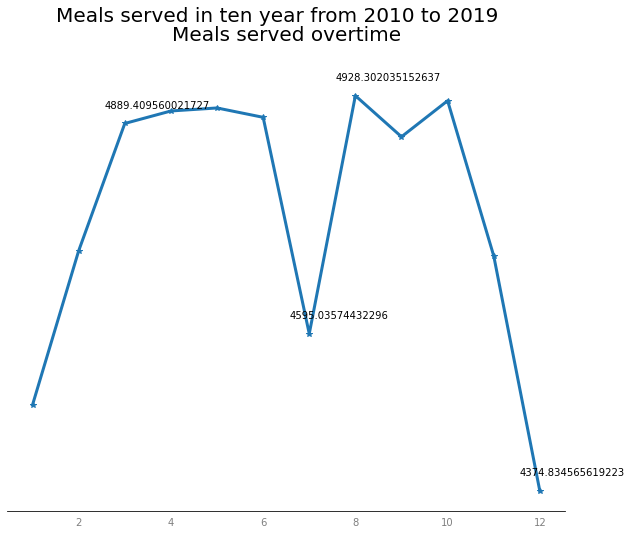

In [5]:
fig, ax = plt.subplots(figsize = (10,8))
x_val = df['month']
y_val = df['traffic_volume']
ax.plot(x_val, y_val, linewidth = 3,marker = '*')
ax.spines[['left','right','top']].set_visible(False)
ax.tick_params(bottom = False)
plt.xticks(color = 'grey')
month_lst =[3,7,8,12]
for x, y in zip(x_val, y_val):
    if x in month_lst:
        label = "{}".format(y)
        ax.annotate(label, (x,y), xytext = (-20,15), textcoords= 'offset points')
ax.get_yaxis().set_visible(False)
plt.title('Meals served overtime',size =20, pad=35)
plt.suptitle('Meals served in ten year from 2010 to 2019', size=20, y=1)
plt.show()

In [6]:
df1 = pd.read_csv('/Users/quyngodseb63/Downloads/sales.csv')

In [7]:
df1

,DateTime,NbOfSalesEmployees,Revenue(Millions)
0,Jan-13,82,0.60
1,Feb-13,91,0.50
2,Mar-13,105,0.70
3,Apr-13,112,0.90
4,May-13,111,0.60
5,Jun-13,109,0.60
6,Jul-13,110,0.80
7,Aug-13,110,1.00
8,Sep-13,110,1.05
9,Oct-13,111,1.05


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DateTime            12 non-null     object 
 1   NbOfSalesEmployees  12 non-null     int64  
 2   Revenue(Millions)   12 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 416.0+ bytes


In [17]:
# df1['DateTime'] = pd.to_datetime(df1['DateTime'])

Text(-2.9, -0.05, 'Revenue (Millions)')

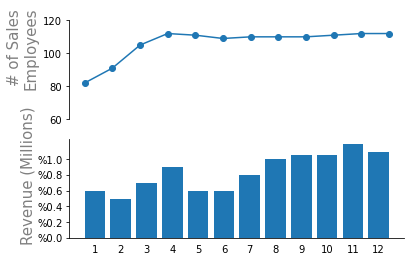

In [79]:
fig, ax = plt.subplots(2)

ax[0].plot(df1['DateTime'],df1['NbOfSalesEmployees'], marker = 'o')
ax[0].spines[['top', 'right', 'bottom']].set_visible(False)
ax[0].tick_params(bottom = False)
ax[0].get_xaxis().set_visible(False)
ax[0].set_yticks([i for i in range(60,140,20)])
ax[0].text(-2.8,82, '# of Sales',fontsize = 15, color = 'grey', rotation = 90)
ax[0].text(-2.2,80,'Employees',fontsize = 15, color = 'grey', rotation = 90)
ax[1].bar(df1['DateTime'],df1['Revenue(Millions)'])
ax[1].spines[['top','right']].set_visible(False)
ax[1].tick_params(bottom = False)
ax[1].set_xticks(df1['DateTime'], [i for i in range(1,13,1)])
ax[1].set_yticks([0,0.2,0.4,0.6,0.8,1])
ax[1].set_yticklabels(["%" + str(y) for y in ax[1].get_yticks()])
ax[1].text(-2.9,-0.05,'Revenue (Millions)',fontsize = 15, color = 'grey', rotation = 90)

In [80]:
df2 = pd.read_csv('/Users/quyngodseb63/Downloads/nutrition_facts.csv')

In [81]:
df2

,Unnamed: 0,Menu,Calories
0,0,Brewed CoffeeShort,3
1,1,Brewed CoffeeTall,4
2,2,Brewed CoffeeGrande,5
3,3,Brewed CoffeeVenti,5
4,4,Caffè LatteShort Nonfat Milk,70
...,...,...,...
350,108,Justin's Chocolate Hazelnut Butter,180
351,109,Justin's Classic Almond Butter,190
352,110,Lemon Chiffon Yogurt,340
353,111,Organic Avocado (Spread),90


In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  355 non-null    int64 
 1   Menu        355 non-null    object
 2   Calories    355 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 8.4+ KB


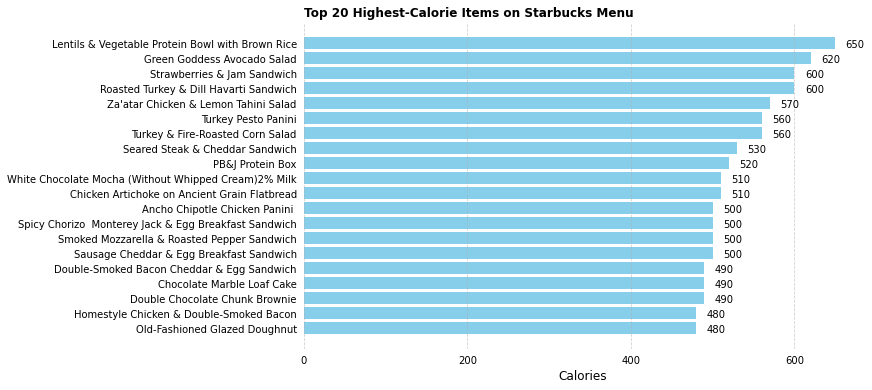

In [111]:
# Sort the data by Calories in descending order to get the top 20 highest-calorie items
top_20_items = df2.sort_values(by='Calories', ascending=False).head(20)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_20_items['Menu'], top_20_items['Calories'], color='skyblue')
ax.spines[['top','bottom','right','left']].set_visible(False)
ax.tick_params(left = False, bottom = False)
ax.set_xticks([i for i in range(0,800,200)])
ax.set_title('Top 20 Highest-Calorie Items on Starbucks Menu',fontweight = 'bold', fontsize = 12, loc = 'left')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)  
plt.xlabel('Calories', fontsize=12)  
for x, y in zip(top_20_items['Calories'],top_20_items['Menu']):
    label = "{}".format(x)
    ax.annotate(label, (x,y), xytext = (20,-4), textcoords= 'offset points', ha = 'center')
plt.show()